## Callcenter Case

A seguir descrevemos os passos realizados na construção de um modelo de detecção de aderência para o referido banco.


### Tratando o problema de variáveis faltantes

In [1]:
# Verificando o número de registros com variáveis faltando
import preprocessing
preprocessing.checkForIncompleteRegisters("data/callcenter_case.csv")

Total number of registers:  41188
Number of registers missing variables:  10700


In [2]:
# Analisando se alguma feature é responsável por parte significativa das variáveis faltantes
import preprocessing
preprocessing.checkMissingVariablesByFeature()

profissao 330
emprestimo_pessoal 990
emprestimo_moradia 990
inadimplente 8597
estado_civil 80
educacao 1731


Study about feature:  inadimplente
sim 3
nao 32588


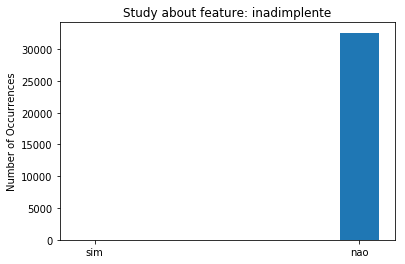

In [3]:
# A feature "inadimplente" é responsável pela maior parte das variáveis faltantes. Assim, vamos avaliar o impacto da remoção dessa feature
import preprocessing
preprocessing.featureDistribution(4)

In [1]:
# Como podemos observar, o atributo com maior número de variáveis faltantes quase não gera ganho de informação, então iremos remover essa feature dos dados.
import preprocessing
preprocessing.removeSpecificFeature(4, "data/callcenter_case.csv",\
            "data/callcenter_case_no-inadimplente.csv")

Feature "inadimplente" removed from data.


In [2]:
# Depois de remover a feature "inadimplente", vamos verificar o número de registros restantes que ainda contém alguma variável faltante.
import preprocessing
preprocessing.checkForIncompleteRegisters("data/callcenter_case_no-inadimplente.csv")

Total number of registers:  41188
Number of registers missing variables:  2943


In [2]:
# Nesse ponto, temos 7% dos registros (redução de 25% para 7%). Podemos escolher entre três opções: (1) procurar outras features para remover que não oferecem ganho de informação e que reduziriam a quantidade de registros com variáveis faltantes; (2) preencher as variáveis faltantes de acordo com alguma regra, p.ex., média, mais frequente, etc.; e (3) remover esses regitros. No momento vamos pela opção 3.
import preprocessing
preprocessing.removeRegistersWithMissingVariables("data/callcenter_case_no-inadimplente.csv", "data/callcenter_case_no-inadimplente_no-missing.csv")

# Verificando se o processo funcionou.
preprocessing.checkForIncompleteRegisters("data/callcenter_case_no-inadimplente_no-missing.csv")

Total number of registers:  38245
Number of registers missing variables:  0


### Tratando atributos categóricos

Agora que tratamos o problema de variáveis faltantes, vamos transformar os atributos categóricos em numéricos. Foi implementado três codificações para transformar esses atributos: (1) Label Encoding, (2) One Hot Encoding e (3) Find and Replace. Esse último apenas faz algum mapeamento simples como, por exemplo, substituir 'no' por 0 e 'yes' por 1.

Agora vamos classificar os 18 atributos restantes nas seguintes categorias:

- Numéricos: idade, duracao, qtd_contatos_campanha, dias_ultimo_contato, qtd_contatos_total, indice_precos_consumidor, indice_confianca_consumidor, taxa_juros_media
- Categórico binário: nesse caso, podemos utilizar formas mais simples para tranformar o atributo categórico binário em númerio. São eles: emprestimo_moradia, emprestimo_pessoal, meio_contato.
- Categórico: profissao, estado_civil, educacao, mes, dia_da_semana, campanha_anterior.
- Alvo: aderencia_campanha.


In [1]:
# Agora realizamos a transformação dos atributos categóricos em atributos númericos
from features_transformation import readDatabase,\
        treatCategoricalBinaryFeatures,\
        treatCategoricalFeatures,\
        dumpDatasetBasedOnTransformedRecords
        
input_file = "data/callcenter_case_no-inadimplente_no-missing.csv"
header, records_list = readDatabase(input_file)

# Primeito transformação dos atributos categóricos com apenas duas categorias
treatCategoricalBinaryFeatures(header, records_list)

# Em seguida, realizamos a transformação dos demais atributos categóricos
header, records_list = treatCategoricalFeatures(header, records_list)

# Cria um novo dataset que considera os registros com a transformação
output_file = "data/callcenter_case_fixed.csv"
dumpDatasetBasedOnTransformedRecords(output_file, header, records_list)

### Avaliação de modelos de predição

Depois de transformar os atributos categóricos em atributos númericos, iremos considerar três classificadores: Ranfom Forest, SVM e Naive Bayes. A escolha do Random Forest se baseia no fato que esse classificador geralmente tem bom desempenho em bases desbalanceadas. O SVM e o Naive Bayes tendem a funcionar bem quando temos dados esparsos, sendo o caso depois de transformar os atributos categóricos.

Segue as configurações utilizadas em cada classificador e o/os parâmetros que serão variados:

- Random Forest: aumentamos os número de estimadores de 100 para 1000 e iremos variar a profundidade máxima das árvores.

In [1]:
### Naive- considering all features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, runNaiveBayes
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o Naive Bayes
runNaiveBayes(case_data, case_target, True)

accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
[[27642  6345]
 [ 2558  1700]]


In [1]:
### Random Forest considering all features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_values = [1,2,4,6,8,10]
for depth_value in depth_values:
    print("Max Depth Value: ", depth_value)
    runRandomForest(case_data, case_target, depth_value)

Max Depth Value:  1
accuracy,precision,recall,f1_macro
0.89	0.45	0.50	0.47
Max Depth Value:  2
accuracy,precision,recall,f1_macro
0.85	0.47	0.53	0.49
Max Depth Value:  4
accuracy,precision,recall,f1_macro
0.68	0.44	0.46	0.39
Max Depth Value:  6
accuracy,precision,recall,f1_macro
0.57	0.45	0.41	0.34
Max Depth Value:  8
accuracy,precision,recall,f1_macro
0.49	0.43	0.37	0.30
Max Depth Value:  10
accuracy,precision,recall,f1_macro
0.49	0.43	0.36	0.30


In [8]:
### Random Forest best result confusion matrix ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_value = 2
runRandomForest(case_data, case_target, depth_value, True)

accuracy,precision,recall,f1_macro
0.85	0.47	0.53	0.49
[[32362  1625]
 [ 4036   222]]


In [1]:
### SVM considering all features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o SVM variando o kernel
kernel_values = ['rbf']
c_values = [0.01, 0.1, 1, 10, 100]
for kernel_value in kernel_values:
    print(" >>> Using kernel: ", kernel_value)
    for c_value in c_values:
        print("Using C: ", c_value)
        runSVM(case_data, case_target, kernel_value, c_value)


 >>> Using kernel:  rbf
Using C:  0.01
accuracy,precision,recall,f1_macro
0.90	0.76	0.60	0.61
Using C:  0.1
accuracy,precision,recall,f1_macro
0.90	0.81	0.62	0.64
Using C:  1
accuracy,precision,recall,f1_macro
0.90	0.81	0.61	0.64
Using C:  10
accuracy,precision,recall,f1_macro
0.90	0.80	0.62	0.65
Using C:  100
accuracy,precision,recall,f1_macro
0.87	0.78	0.62	0.63


In [1]:
### SVM Best Result Confusion Matrix -- considering all features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o SVM variando o kernel
kernel_value = 'rbf'
c_value = 10
runSVM(case_data, case_target, kernel_value, c_value, True)

accuracy,precision,recall,f1_macro
0.90	0.80	0.62	0.65
[[33217   770]
 [ 3113  1145]]


In [3]:
### Random Forest considering a subset of features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_values = [1,2,4,6,8,10]
for depth_value in depth_values:
    print("Max Depth Value: ", depth_value)
    runRandomForest(case_data, case_target, depth_value)

Max Depth Value:  1


In [1]:
### SVM considering a subset of features ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, 10)

# Executa o SVM variando o kernel
kernel_values = ['linear', 'rbf']
for kernel_value in kernel_values:
    print("Using kernel: ", kernel_value)
    c_value = 1
    runSVM(case_data, case_target, kernel_value, c_value)

Using kernel:  linear
accuracy,precision,recall,f1_macro
0.89	0.78	0.62	0.63
Using kernel:  rbf
accuracy,precision,recall,f1_macro
0.90	0.80	0.62	0.64


### Normalização dos atributos numéricos

Nesse ponto realizamos a normalização dos atributos númericos e em seguida refazemos as avaliações para verificar se os resultados foram melhores, piores ou se mantiveram da mesma forma. Normalizamos os atributos para que todos fiquem entre 0 e 1.

Fizemos um tratamento especial para o atributo "dias_ultimo_contato", pois vários registros apresentabam o valor como 999 (muito acima dos demais valores) e acabava dificultando a diferenciação entre os valores menores. Assim, substituímos o valor 999 pelo valor dado pelo dobro do segundo maior valor, i.e., 2*27 = 54.

In [1]:
from features_transformation import normalizeNumericFeatures,\
        dumpDatasetBasedOnTransformedRecords,\
        readDatabase

# Realiza a normalização dos atributos numéricos
input_file = "data/callcenter_case_fixed.csv"
header, records_list = readDatabase(input_file)
normalizeNumericFeatures(header, records_list)

# Cria um novo dataset que considera os registros com a normalização
output_file = "data/callcenter_case_fixed_normalized.csv"
dumpDatasetBasedOnTransformedRecords(output_file, header, records_list)

### Reavaliação dos métodos de predição considerando a base de dados normalizada

Fizemos a normalização dos atributos numéricos e agora vamos avaliar a qualidade do modelo depois de realizar a operação. Vamos variar os mesmos parâmetros avaliados anteriormente.

In [1]:
### Naive- considering all features -- Normalized Data ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, runNaiveBayes
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o Naive Bayes
runNaiveBayes(case_data, case_target, True)

accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
[[27781  6206]
 [ 2564  1694]]


In [1]:
### Random Forest considering all features -- Normalized Data ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_values = [1,2,4,6,8,10]
for depth_value in depth_values:
    print("Max Depth Value: ", depth_value)
    runRandomForest(case_data, case_target, depth_value)

Max Depth Value:  1
accuracy,precision,recall,f1_macro
0.89	0.45	0.50	0.47
Max Depth Value:  2
accuracy,precision,recall,f1_macro
0.85	0.47	0.53	0.49
Max Depth Value:  4
accuracy,precision,recall,f1_macro
0.68	0.44	0.46	0.39
Max Depth Value:  6
accuracy,precision,recall,f1_macro
0.57	0.45	0.41	0.34
Max Depth Value:  8
accuracy,precision,recall,f1_macro
0.49	0.43	0.37	0.30
Max Depth Value:  10
accuracy,precision,recall,f1_macro
0.49	0.43	0.37	0.30


In [1]:
### SVM considering all features -- Normalized Dataset ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o SVM variando o kernel
kernel_values = ['rbf']
c_values = [0.01, 0.1, 1, 10, 100]
for kernel_value in kernel_values:
    print(" >>> Using kernel: ", kernel_value)
    for c_value in c_values:
        print("Using C: ", c_value)
        runSVM(case_data, case_target, kernel_value, c_value)

 >>> Using kernel:  rbf
Using C:  0.01
accuracy,precision,recall,f1_macro
0.89	0.47	0.52	0.49
Using C:  0.1
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52
Using C:  1
accuracy,precision,recall,f1_macro
0.74	0.59	0.48	0.45
Using C:  10
accuracy,precision,recall,f1_macro
0.72	0.56	0.48	0.45
Using C:  100
accuracy,precision,recall,f1_macro
0.71	0.55	0.48	0.46


In [12]:
### SVM best result confusion matrix -- Normalized Dataset ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getCompleteData(header, records_list)

# Executa o SVM variando o kernel
kernel_value = 'rbf'
c_value = 0.1
runSVM(case_data, case_target, kernel_value, c_value, True)

### Seleção de features

A fim de maximizar a utilidade dos atributos que oferecem maior ganho de informação, evitando que outros atributos que não ajudam no processo de classificação atrapalhem o processo, vamos utilizar o método SelectKBest para tentar selecionar apenas K atributos para serem utilizados na classificação.

In [5]:
### Naive Bayes considering Top features -- Normalized Dataset ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, runNaiveBayes
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

# Executa o Naive Bayes
num_feats_list = [5, 10, 15]
for num_feat in range(1,21):
    print("Number of features to select: ", num_feat)
    case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, num_feat, True)
    runNaiveBayes(case_data, case_target, True)

Number of features to select:  1
accuracy,precision,recall,f1_macro
0.90	0.79	0.59	0.60
[[33547   440]
 [ 3455   803]]
Number of features to select:  2
accuracy,precision,recall,f1_macro
0.90	0.78	0.61	0.62
[[33314   673]
 [ 3255  1003]]
Number of features to select:  3
accuracy,precision,recall,f1_macro
0.90	0.78	0.61	0.62
[[33314   673]
 [ 3255  1003]]
Number of features to select:  4
accuracy,precision,recall,f1_macro
0.89	0.78	0.63	0.63
[[32989   998]
 [ 3046  1212]]
Number of features to select:  5
accuracy,precision,recall,f1_macro
0.89	0.79	0.64	0.64
[[32740  1247]
 [ 2924  1334]]
Number of features to select:  6
accuracy,precision,recall,f1_macro
0.89	0.78	0.65	0.64
[[32467  1520]
 [ 2826  1432]]
Number of features to select:  7
accuracy,precision,recall,f1_macro
0.89	0.82	0.68	0.69
[[32223  1764]
 [ 2478  1780]]
Number of features to select:  8
accuracy,precision,recall,f1_macro
0.89	0.80	0.70	0.70
[[31970  2017]
 [ 2334  1924]]
Number of features to select:  9
accuracy,precis

In [1]:
### Random Forest considering a subset of features -- Normalized Data ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, 10, True)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_values = [1,2,4,6,8,10]
for depth_value in depth_values:
    print("Max Depth Value: ", depth_value)
    runRandomForest(case_data, case_target, depth_value)

Max Depth Value:  1
accuracy,precision,recall,f1_macro
0.89	0.50	0.54	0.52
Max Depth Value:  2
accuracy,precision,recall,f1_macro
0.74	0.52	0.50	0.41
Max Depth Value:  4
accuracy,precision,recall,f1_macro
0.72	0.59	0.51	0.42
Max Depth Value:  6
accuracy,precision,recall,f1_macro
0.58	0.45	0.44	0.34
Max Depth Value:  8
accuracy,precision,recall,f1_macro
0.58	0.46	0.44	0.34
Max Depth Value:  10
accuracy,precision,recall,f1_macro
0.55	0.55	0.42	0.33


In [2]:
### Random Forest considering a subset of features -- Normalized Data ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

# Executa o Random Forest variando a profundidade entre 2 e 10
depth_values = [1,2,3]
num_feats_list = [2,4,6,8,10]
for depth_value in depth_values:
    print(">>> Max Depth Value: ", depth_value)
    for num_feat in num_feats_list:
        print("Number of features to select: ", num_feat)
        case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, num_feat, True)
        runRandomForest(case_data, case_target, depth_value, True)

>>> Max Depth Value:  1
Number of features to select:  2
accuracy,precision,recall,f1_macro
0.89	0.59	0.51	0.48
[[33975    12]
 [ 4206    52]]
Number of features to select:  4
accuracy,precision,recall,f1_macro
0.74	0.47	0.50	0.40
[[33398   589]
 [ 4001   257]]
Number of features to select:  6
accuracy,precision,recall,f1_macro
0.88	0.49	0.54	0.51
[[33657   330]
 [ 4035   223]]
Number of features to select:  8
accuracy,precision,recall,f1_macro
0.89	0.51	0.52	0.50
[[33924    63]
 [ 4158   100]]
Number of features to select:  10
accuracy,precision,recall,f1_macro
0.89	0.51	0.52	0.50
[[33815   172]
 [ 4074   184]]
>>> Max Depth Value:  2
Number of features to select:  2
accuracy,precision,recall,f1_macro
0.89	0.76	0.59	0.59
[[33314   673]
 [ 3396   862]]
Number of features to select:  4
accuracy,precision,recall,f1_macro
0.73	0.47	0.50	0.40
[[31259  2728]
 [ 3527   731]]
Number of features to select:  6
accuracy,precision,recall,f1_macro
0.74	0.47	0.50	0.40
[[31476  2511]
 [ 3800   458]]

In [2]:
### SVM considering Top 5 features -- Normalized Dataset ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)
case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, 5, True)

# Executa o SVM variando o kernel
kernel_values = ['rbf', 'sigmoid','linear']
c_values = [0.01, 0.1, 1, 10, 100]
for kernel_value in kernel_values:
    print(" >>> Using kernel: ", kernel_value)
    for c_value in c_values:
        print("Using C: ", c_value)
        runSVM(case_data, case_target, kernel_value, c_value)

 >>> Using kernel:  rbf
Using C:  0.01
accuracy,precision,recall,f1_macro
0.88	0.73	0.59	0.59
Using C:  0.1
accuracy,precision,recall,f1_macro
0.87	0.72	0.58	0.57
Using C:  1
accuracy,precision,recall,f1_macro
0.85	0.62	0.57	0.54
Using C:  10
accuracy,precision,recall,f1_macro
0.85	0.61	0.56	0.53
Using C:  100
accuracy,precision,recall,f1_macro
0.85	0.60	0.56	0.52
 >>> Using kernel:  sigmoid
Using C:  0.01
accuracy,precision,recall,f1_macro
0.90	0.79	0.59	0.60
Using C:  0.1
accuracy,precision,recall,f1_macro
0.90	0.67	0.62	0.60
Using C:  1
accuracy,precision,recall,f1_macro
0.87	0.62	0.63	0.60
Using C:  10
accuracy,precision,recall,f1_macro
0.81	0.67	0.61	0.57
Using C:  100
accuracy,precision,recall,f1_macro
0.80	0.67	0.61	0.58
 >>> Using kernel:  linear
Using C:  0.01
accuracy,precision,recall,f1_macro
0.89	0.79	0.59	0.59
Using C:  0.1
accuracy,precision,recall,f1_macro
0.88	0.78	0.60	0.59
Using C:  1
accuracy,precision,recall,f1_macro
0.88	0.78	0.60	0.59
Using C:  10
accuracy,precisi

In [3]:
### SVM considering Top K features -- Normalized Dataset ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)


# Executa o SVM variando o kernel
kernel_value = 'sigmoid'
c_value = 0.01
num_feats_list = [2,4,6,8,10]
for num_feat in num_feats_list:
    print("Number of features to select: ", num_feat)
    case_data, case_target = getDataFromBestKFeaturesSelection(header, records_list, num_feat, True)    
    runSVM(case_data, case_target, kernel_value, c_value, True)

Number of features to select:  2
accuracy,precision,recall,f1_macro
0.90	0.79	0.59	0.60
[[33547   440]
 [ 3455   803]]
Number of features to select:  4
accuracy,precision,recall,f1_macro
0.90	0.79	0.59	0.60
[[33520   467]
 [ 3434   824]]
Number of features to select:  6
accuracy,precision,recall,f1_macro
0.90	0.79	0.59	0.60
[[33474   513]
 [ 3415   843]]
Number of features to select:  8
accuracy,precision,recall,f1_macro
0.88	0.69	0.58	0.58
[[32835  1152]
 [ 3470   788]]
Number of features to select:  10
accuracy,precision,recall,f1_macro
0.89	0.71	0.52	0.50
[[33659   328]
 [ 4006   252]]


In [1]:
### SVM considering all features -- Normalized Dataset -- Using PCA ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, getDataPCATransformed
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

# Executa o SVM variando o kernel
kernel_value = 'sigmoid'
c_value = 0.1

# Executa o SVM variando o número de componente do PCA
n_comps = [5,10,15,20,25]
for n_comp in n_comps:
    print("Number of components being used: ", n_comp)
    case_data, case_target = getDataPCATransformed(header, records_list, n_comp)
    runSVM(case_data, case_target, kernel_value, c_value)

Number of components being used:  5
accuracy,precision,recall,f1_macro
0.81	0.62	0.54	0.52
Number of components being used:  10
accuracy,precision,recall,f1_macro
0.81	0.62	0.54	0.52
Number of components being used:  15
accuracy,precision,recall,f1_macro
0.81	0.62	0.54	0.52
Number of components being used:  20
accuracy,precision,recall,f1_macro
0.81	0.62	0.54	0.52
Number of components being used:  25


In [7]:
### SVM considering all features -- Normalized Dataset -- Using PCA ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, getDataPCATransformed
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

# Executa o SVM variando o kernel
kernel_value = 'rbf'
c_value = 0.1

# Executa o SVM variando o número de componente do PCA
n_comps = [5,10,15,20,25]
for n_comp in n_comps:
    print("Number of components being used: ", n_comp)
    case_data, case_target = getDataPCATransformed(header, records_list, n_comp)
    runSVM(case_data, case_target, kernel_value, c_value)

Number of components being used:  5
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52
Number of components being used:  10
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52
Number of components being used:  15
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52
Number of components being used:  20
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52
Number of components being used:  25
accuracy,precision,recall,f1_macro
0.80	0.74	0.55	0.52


In [4]:
### Random Forest considering all features -- Normalized Dataset -- Using PCA ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, getDataPCATransformed
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

max_depth = 2

# Executa o Random Forest variando o número de componente do PCA
n_comps = [5,10,15,20,25]
for n_comp in n_comps:
    print("Number of components being used: ", n_comp)
    case_data, case_target = getDataPCATransformed(header, records_list, n_comp)
    runRandomForest(case_data, case_target, max_depth)

Number of components being used:  5
accuracy,precision,recall,f1_macro
0.85	0.47	0.53	0.49
Number of components being used:  10
accuracy,precision,recall,f1_macro
0.85	0.46	0.51	0.48
Number of components being used:  15
accuracy,precision,recall,f1_macro
0.85	0.47	0.53	0.49
Number of components being used:  20
accuracy,precision,recall,f1_macro
0.86	0.47	0.52	0.49
Number of components being used:  25
accuracy,precision,recall,f1_macro
0.85	0.47	0.52	0.49


In [6]:
### Naive bayes considering all features -- Normalized Dataset -- Using PCA ###

from classifiers import readDatabase, getCompleteData,\
        getDataFromBestKFeaturesSelection,\
        runRandomForest, runSVM, getDataPCATransformed,\
        runNaiveBayes
        
# Leitura da base de dados e preparação dos dados
input_file = "data/callcenter_case_fixed_normalized.csv"
header, records_list = readDatabase(input_file)

# Executa o Naive Bayes variando o número de componente do PCA
n_comps = [5,10,15,20,25]
for n_comp in range(1,25):
    print("Number of components being used: ", n_comp)
    case_data, case_target = getDataPCATransformed(header, records_list, n_comp)
    runNaiveBayes(case_data, case_target)

Number of components being used:  1
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  2
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  3
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  4
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  5
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  6
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  7
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  8
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  9
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  10
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.56
Number of components being used:  11
accuracy,precision,recall,f1_macro
0.77	0.65	0.61	0.